<a href="https://colab.research.google.com/github/Nadia-Mas/Texas-Search-AI/blob/main/TexasSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 3793: Assignment-1

**Masoumi- Fatemeh Sadat(Nadia)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**.
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread **(Uninformed Search)**.
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine **(Informed Search)** from the city with high supply *(low demand)* to the city with low supply *(high demand)*.

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [ ]:
# Add only your imports here

import csv
import math
import os
import matplotlib.pyplot as plt
from collections import deque
import heapq

In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/Artificial Intelligence/Data/"
CITIES_CSV = os.path.join(basePath,'cities.csv')
DISTANCES_CSV = os.path.join(basePath, 'distances.csv')
TEXAS_MAP_IMAGE = os.path.join(basePath, 'texas-map-2.png')


In [ ]:
# Load the graph data from the files
def load_cities(csv_path):
    pos = {}
    with open(csv_path, newline='', encoding="utf-8") as f:
        reader = csv.reader(f)
        for row in reader:
            if not row or len(row) < 3:
                continue
            city = row[0].strip()
            lat = float(row[1])
            lon = float(row[2])
            pos[city] = (lat, lon)
    return pos

def load_weighted_edges(csv_path):
    g = {}
    with open(csv_path, newline='', encoding="utf-8") as f:
        reader = csv.reader(f)
        for row in reader:
            if not row or len(row) < 3:
                continue
            a = row[0].strip()
            b = row[1].strip()
            w = float(row[2])
            g.setdefault(a, {})[b] = w
            g.setdefault(b, {})[a] = w
    return g



positions = load_cities(CITIES_CSV)
graph = load_weighted_edges(DISTANCES_CSV)
print(f"Loaded {len(positions)} cities and {sum(len(v) for v in graph.values())//2} edges.")

Loaded 39 cities and 47 edges.


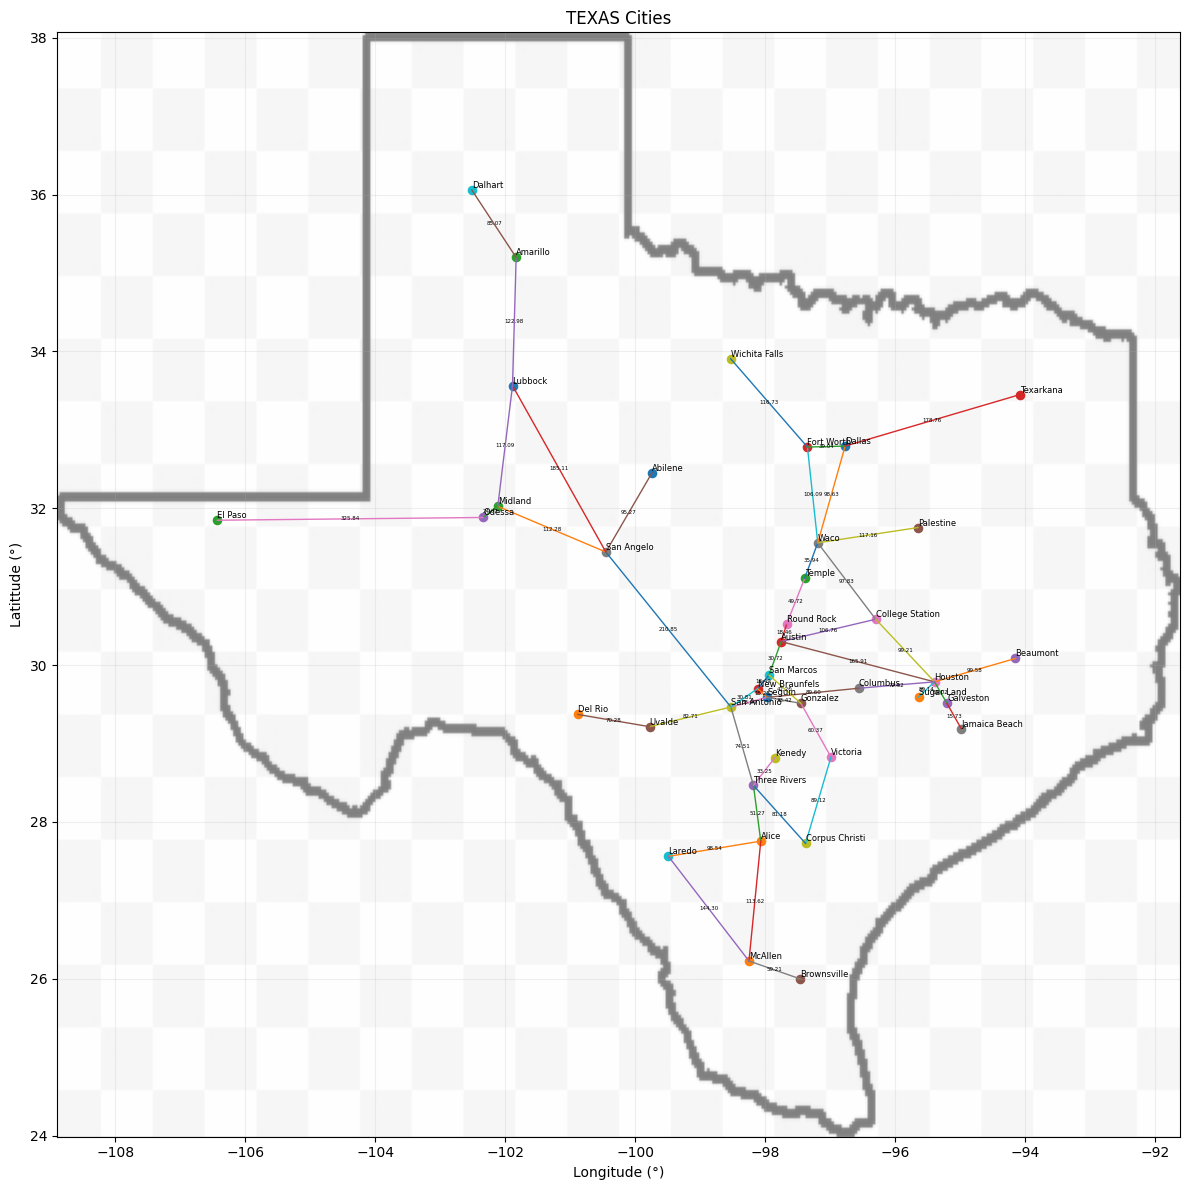

In [ ]:
# Display a 2D graph of the given data.
def plot_graph_with_overlay(positions, graph, overlay_path=None, title='2D Graph of Texas cities'):
  lats = [positions[c][0] for c in positions]
  lons = [positions[c][1] for c in positions]

  plt.figure(figsize=(12, 12))

  #for extera credits :)****
  if overlay_path and os.path.exists(overlay_path):
    img = plt.imread(overlay_path)
    pad_lat = (max(lats) - min(lats)) * 0.2 if lats else 1
    pad_lon = (max(lons) - min(lons)) * 0.2 if lons else 1
    extent = [min(lons) - pad_lon, max(lons) + pad_lon, min(lats) - pad_lat, max(lats) + pad_lat]
    plt.imshow(img, extent=extent, aspect='auto', alpha = 0.5)


  #drawing edges
  for a in graph:
    for b, w in graph[a].items():
      if a<b:
        latA, lonA = positions[a]
        latB, lonB = positions[b]
        plt.plot([lonA, lonB], [latA, latB], linewidth =1)

        mid_lon = (lonA + lonB) / 2
        mid_lat = (latA + latB) / 2
        plt.text(mid_lon, mid_lat, f'{w:.2f}', ha='center', va='center', fontsize=4)

  #drawing nodes with names
  for city, (lat, lon) in positions.items():
    plt.scatter(lon, lat, s=35)
    plt.text(lon, lat, city, fontsize=6, ha='left', va='bottom')
  plt.title(title)
  plt.xlabel("Longitude (°)")
  plt.ylabel("Latittude (°)")
  plt.grid(True, alpha = 0.2)
  plt.tight_layout()
  plt.show()

plot_graph_with_overlay(positions, graph, overlay_path=TEXAS_MAP_IMAGE, title='TEXAS Cities')


#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
#bfs algorithm
def bfs_spread_all(graph, start):
    if start not in graph:
        print(f"[Warning] start city '{start}' not found. Using '{next(iter(graph))}' instead.")
        start = next(iter(graph))

    visited = set([start])
    order = []
    tree_edges = []
    q = deque([start])


    while q:
        u = q.popleft()
        order.append(u)
        for v in sorted(graph.get(u, {}).keys()):  # alphabetical for determinism
            if v not in visited:
                visited.add(v)
                q.append(v)
                tree_edges.append((u, v))

    for city in sorted(graph.keys()):
        if city not in visited:
            visited.add(city)
            q = deque([city])
            while q:
                u = q.popleft()
                order.append(u)
                for v in sorted(graph.get(u, {}).keys()):
                    if v not in visited:
                        visited.add(v)
                        q.append(v)
                        tree_edges.append((u, v))

    total_distance = sum(graph[u][v] for (u, v) in tree_edges if v in graph.get(u, {}))
    return order, tree_edges, total_distance


start_city = "Three Rivers"
order, tree_edges, total_distance = bfs_spread_all(graph, start_city)

print("Sequence of infected cities (BFS order):")
print(order)
print("\ntotal distance traveled by BFS strategy (sum of tree edges):{:.2f} miles".format(total_distance))


Sequence of infected cities (BFS order):
['Three Rivers', 'Alice', 'Corpus Christi', 'Kenedy', 'San Antonio', 'Laredo', 'McAllen', 'Victoria', 'New Braunfels', 'San Angelo', 'Seguin', 'Uvalde', 'Brownsville', 'Gonzalez', 'San Marcos', 'Abilene', 'Lubbock', 'Midland', 'Columbus', 'Del Rio', 'Austin', 'Amarillo', 'Odessa', 'Houston', 'College Station', 'Round Rock', 'Dalhart', 'El Paso', 'Beaumont', 'Galveston', 'Sugar Land', 'Waco', 'Temple', 'Jamaica Beach', 'Dallas', 'Fort Worth', 'Palestine', 'Texarkana', 'Wichita Falls']

total distance traveled by BFS strategy (sum of tree edges):3381.27 miles


#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Optimal vaccine transportation path (A*):
['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'College Station']
Total distance traveled: 186.77 miles


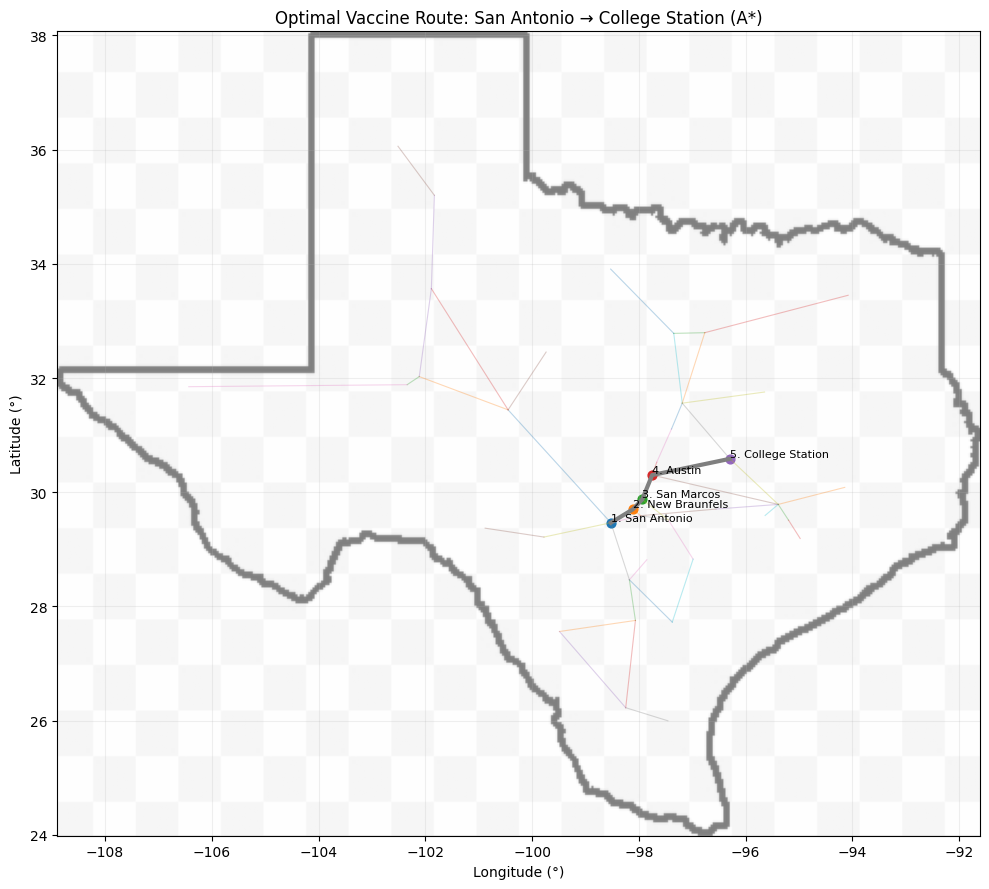

In [ ]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
# Vaccine Transportation - Informed Search Agent (A*)
# Optimal path from San Antonio (high supply) -> College Station (shortage).
# Prints the path and total distance, then overlays it on the Texas map.

import math, os
import matplotlib.pyplot as plt

def straight_line_miles(a, b, positions):
    "Admissible heuristic:straight-line miles using lat/lon."
    lat1,lon1 = positions[a]
    lat2,lon2 = positions[b]
    dlat = lat2 -lat1
    mean_lat_rad = math.radians((lat1 + lat2) / 2.0)
    dlon =(lon2 - lon1) * math.cos(mean_lat_rad)
    deg = math.hypot(dlat, dlon)
    return 69.0 * deg  # ~ miles per degree

def a_star_path(graph, positions, start, goal):
    "A* search returning (optimal_path, total_cost)."
    import heapq
    if start not in graph or goal not in graph:
        raise ValueError("Start or goal city not found in graph.")
    if start == goal:
        return [start], 0.0

    gscore = {start: 0.0}
    parent = {start: None}
    open_heap = []
    heapq.heappush(open_heap, (straight_line_miles(start, goal, positions), 0.0, start))
    closed = set()

    while open_heap:
        f, g, u = heapq.heappop(open_heap)
        if u in closed:
            continue
        if u == goal:
            #reconstructt
            path = []
            cur = u
            while cur is not None:
                path.append(cur)
                cur = parent[cur]
            path.reverse()
            return path, gscore[u]
        closed.add(u)

        for v, w in graph[u].items():
            tentative = gscore[u] + w
            if v in closed and tentative >= gscore.get(v, math.inf):
                continue
            if tentative < gscore.get(v, math.inf):
                gscore[v] = tentative
                parent[v] = u
                h = straight_line_miles(v, goal, positions)
                heapq.heappush(open_heap, (tentative + h, tentative, v))

    return None, math.inf  #no path

def plot_path_on_map(positions, graph, path, overlay_path=None, title="Optimal Vaccine Route"):
    "Overlay the selected A* path on the 2D graph and Texas map (extra credit)."
    lats = [positions[c][0] for c in positions]
    lons = [positions[c][1] for c in positions]

    plt.figure(figsize=(10, 9))

    #Optional map overlay
    if overlay_path and os.path.exists(overlay_path):
        img = plt.imread(overlay_path)
        pad_lat = (max(lats) - min(lats))*0.2 if lats else 1
        pad_lon = (max(lons) - min(lons))*0.2 if lons else 1
        extent = [min(lons)-pad_lon, max(lons)+pad_lon, min(lats)-pad_lat, max(lats)+pad_lat]
        plt.imshow(img, extent=extent, aspect='auto', alpha=0.5)

    # Draw full graph
    for a in graph:
        for b, w in graph[a].items():
            if a < b:
                latA, lonA = positions[a]
                latB, lonB = positions[b]
                plt.plot([lonA, lonB], [latA, latB], linewidth=0.8, alpha=0.3)

    # draw path boldly with visit indices
    if path:
        xs = [positions[c][1] for c in path]
        ys = [positions[c][0] for c in path]
        plt.plot(xs, ys, linewidth=3)
        for i, city in enumerate(path):
            lat, lon = positions[city]
            plt.scatter(lon, lat, s=40)
            plt.text(lon, lat, f"{i+1}. {city}", fontsize=8, ha='left', va='bottom')

    plt.title(title)
    plt.xlabel("Longitude (°)")
    plt.ylabel("Latitude (°)")
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

####Run the informed search for the assignment scenario
start_city,goal_city = "San Antonio", "College Station"
path, cost = a_star_path(graph, positions, start_city, goal_city)

if path is None:
    print("No path found between the selected cities.")
else:
    print("Optimal vaccine transportation path (A*):")
    print(path)
    print("Total distance traveled: {:.2f} miles".format(cost))

    #Extra Credit: overlay the selected path on the Texas map :)
    plot_path_on_map(
        positions, graph, path,
        overlay_path=TEXAS_MAP_IMAGE,
        title=f"Optimal Vaccine Route: {start_city} → {goal_city} (A*)"
    )


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



